In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

actual_2024_access = 49.0  # Account Ownership
actual_2024_usage = 35.0   # Digital Payment Adoption

years = [2025, 2026, 2027]

rates = {
    'access': {'base': 0.04, 'opt': 0.08, 'pess': 0.01},
    'usage': {'base': 0.06, 'opt': 0.12, 'pess': 0.02}
}

def generate_forecast(start_val, indicator_rates):
    forecast = {'Year': years}
    for scenario, rate in indicator_rates.items():
        vals = []
        curr = start_val
        for y in years:
            curr = curr * (1 + rate)
            vals.append(round(curr, 2))
        forecast[scenario] = vals
    return pd.DataFrame(forecast)


df_access_fc = generate_forecast(actual_2024_access, rates['access'])
df_usage_fc = generate_forecast(actual_2024_usage, rates['usage'])

print("--- Access Forecast (2025-2027) ---")
print(df_access_fc)

df_access_fc.to_csv("../data/processed/forecast_access.csv", index=False)
df_usage_fc.to_csv("../data/processed/forecast_usage.csv", index=False)

--- Access Forecast (2025-2027) ---
   Year   base    opt   pess
0  2025  50.96  52.92  49.49
1  2026  53.00  57.15  49.98
2  2027  55.12  61.73  50.48


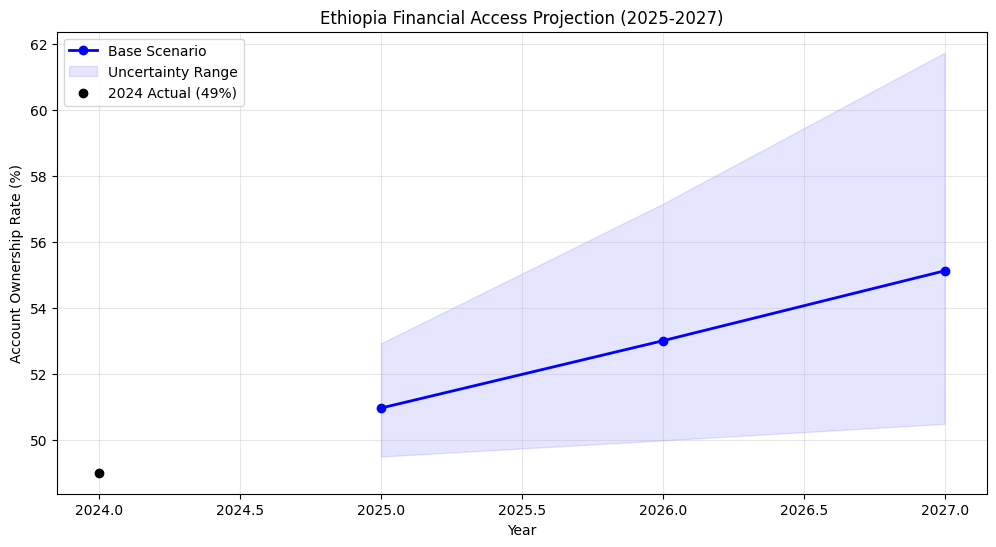

In [2]:
plt.figure(figsize=(12, 6))

# Plot scenarios
plt.plot(years, df_access_fc['base'], label='Base Scenario', marker='o', color='blue', linewidth=2)
plt.fill_between(years, df_access_fc['pess'], df_access_fc['opt'], color='blue', alpha=0.1, label='Uncertainty Range')

# Add 2024 baseline
plt.scatter([2024], [49.0], color='black', label='2024 Actual (49%)', zorder=5)

plt.title("Ethiopia Financial Access Projection (2025-2027)")
plt.ylabel("Account Ownership Rate (%)")
plt.xlabel("Year")
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig("../reports/figures/access_forecast_plot.png")
plt.show()